In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library
import requests
# Import the API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

583

In [5]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1
# Loop through all the cities in the list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # create endpoint URL with each city
    #city_url = url + "&q=" + city.replace("","+"), if there is no space between "", nothing will be replaced
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count})|{city}")
    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1)|codrington
Processing Record 2 of Set 1)|punta arenas
Processing Record 3 of Set 1)|east london
Processing Record 4 of Set 1)|tasiilaq
Processing Record 5 of Set 1)|port hedland
Processing Record 6 of Set 1)|barrow
Processing Record 7 of Set 1)|saldanha
Processing Record 8 of Set 1)|albany
Processing Record 9 of Set 1)|saint-philippe
Processing Record 10 of Set 1)|tual
Processing Record 11 of Set 1)|busselton
Processing Record 12 of Set 1)|ribeira grande
Processing Record 13 of Set 1)|dubbo
Processing Record 14 of Set 1)|illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1)|rikitea
Processing Record 16 of Set 1)|thompson
Processing Record 17 of Set 1)|faanui
Processing Record 18 of Set 1)|faya
Processing Record 19 of Set 1)|beringovskiy
Processing Record 20 of Set 1)|hasaki
Processing Record 21 of Set 1)|mukhen
Processing Record 22 of Set 1)|zlatoustovsk
City not found. Skipp

Processing Record 45 of Set 4)|kanye
Processing Record 46 of Set 4)|egvekinot
Processing Record 47 of Set 4)|victoria
Processing Record 48 of Set 4)|goma
Processing Record 49 of Set 4)|shubarshi
Processing Record 50 of Set 4)|xuddur
Processing Record 1 of Set 5)|tomaszow mazowiecki
Processing Record 2 of Set 5)|saint-joseph
Processing Record 3 of Set 5)|berlevag
Processing Record 4 of Set 5)|ponta delgada
Processing Record 5 of Set 5)|wisconsin rapids
Processing Record 6 of Set 5)|arroyo
Processing Record 7 of Set 5)|basco
Processing Record 8 of Set 5)|mwinilunga
Processing Record 9 of Set 5)|bulgan
Processing Record 10 of Set 5)|bethel
Processing Record 11 of Set 5)|shishou
Processing Record 12 of Set 5)|karauzyak
City not found. Skipping...
Processing Record 13 of Set 5)|shingu
Processing Record 14 of Set 5)|mersin
Processing Record 15 of Set 5)|la libertad
Processing Record 16 of Set 5)|mys shmidta
City not found. Skipping...
Processing Record 17 of Set 5)|las matas de farfan
Proces

Processing Record 34 of Set 8)|ileza
Processing Record 35 of Set 8)|maceio
Processing Record 36 of Set 8)|sibolga
Processing Record 37 of Set 8)|rajsamand
Processing Record 38 of Set 8)|linxia
Processing Record 39 of Set 8)|whitehorse
Processing Record 40 of Set 8)|najran
Processing Record 41 of Set 8)|palmer
Processing Record 42 of Set 8)|kulhudhuffushi
Processing Record 43 of Set 8)|narayanganj
Processing Record 44 of Set 8)|utrecht
Processing Record 45 of Set 8)|boende
Processing Record 46 of Set 8)|pangnirtung
Processing Record 47 of Set 8)|cabra
Processing Record 48 of Set 8)|banda aceh
Processing Record 49 of Set 8)|grand gaube
Processing Record 50 of Set 8)|invermere
Processing Record 1 of Set 9)|salamiyah
Processing Record 2 of Set 9)|ovalle
Processing Record 3 of Set 9)|caiaponia
Processing Record 4 of Set 9)|bilma
Processing Record 5 of Set 9)|biloela
Processing Record 6 of Set 9)|srikakulam
Processing Record 7 of Set 9)|sooke
Processing Record 8 of Set 9)|bogande
Processing 

Processing Record 31 of Set 12)|vaitape
Processing Record 32 of Set 12)|strezhevoy
Processing Record 33 of Set 12)|tsihombe
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
len(city_data)

541

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.2667,141.9667,54.99,60,100,21.03,AU,2021-04-11 02:23:40
1,Punta Arenas,-53.1500,-70.9167,48.20,66,40,25.32,CL,2021-04-11 02:19:24
2,East London,-33.0153,27.9116,68.99,89,100,4.97,ZA,2021-04-11 02:23:40
3,Tasiilaq,65.6145,-37.6368,30.20,55,30,4.61,GL,2021-04-11 02:23:41
4,Port Hedland,-20.3167,118.5667,91.40,55,58,10.36,AU,2021-04-11 02:23:41
5,Barrow,71.2906,-156.7887,-7.60,71,40,11.50,US,2021-04-11 02:23:41
6,Saldanha,-33.0117,17.9442,57.20,88,100,9.64,ZA,2021-04-11 02:23:42
7,Albany,42.6001,-73.9662,64.99,60,100,2.82,US,2021-04-11 02:23:42
8,Saint-Philippe,-21.3585,55.7679,77.00,78,0,5.75,RE,2021-04-11 02:23:42
9,Tual,-5.6667,132.7500,83.55,71,75,10.60,ID,2021-04-11 02:23:42


In [8]:
# reorder the columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2021-04-11 02:23:40,-38.2667,141.9667,54.99,60,100,21.03
1,Punta Arenas,CL,2021-04-11 02:19:24,-53.1500,-70.9167,48.20,66,40,25.32
2,East London,ZA,2021-04-11 02:23:40,-33.0153,27.9116,68.99,89,100,4.97
3,Tasiilaq,GL,2021-04-11 02:23:41,65.6145,-37.6368,30.20,55,30,4.61
4,Port Hedland,AU,2021-04-11 02:23:41,-20.3167,118.5667,91.40,55,58,10.36


In [9]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

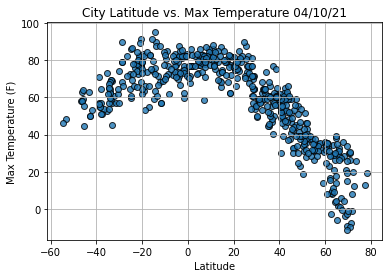

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()


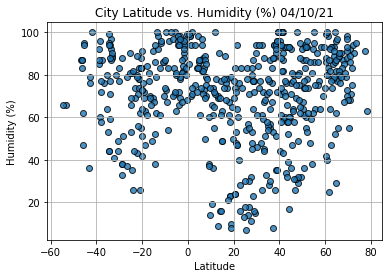

In [12]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()


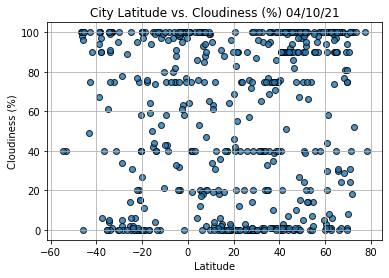

In [13]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

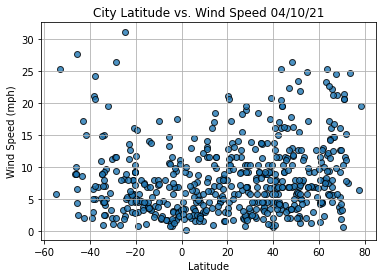

In [14]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [15]:
# x value = independent variable
# y value = dependent variable

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perfrom linear regression on the weather data
# and plot a regressio line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y_values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = "+ str(round(slope,2))+"x + "+str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [33]:
# Create Northern and Sourthern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

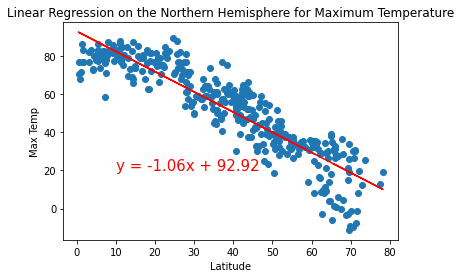

In [34]:
# Linear regression on the Northern Hemisphere max temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,20))

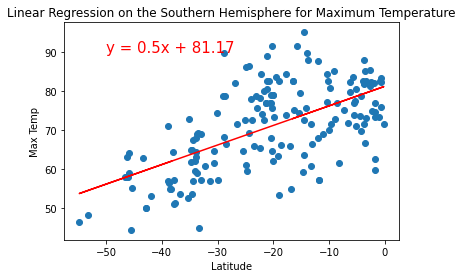

In [36]:
# Linear regression on the Southern Hemisphere max temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,90))

#### Finding
The correlation between the latitude and the maximum temperature is very strong to strong because the r-value is -1.06 for the Northern Hemisphere and 0.5 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. 

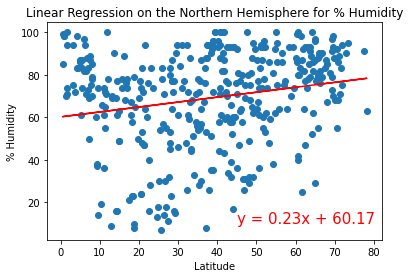

In [37]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(45,10))

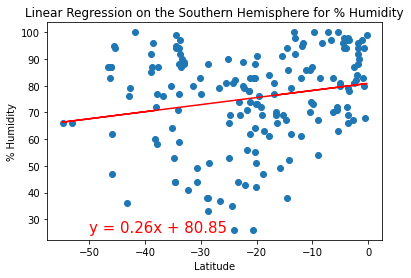

In [38]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',(-50,25))

#### Finding
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.5 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.

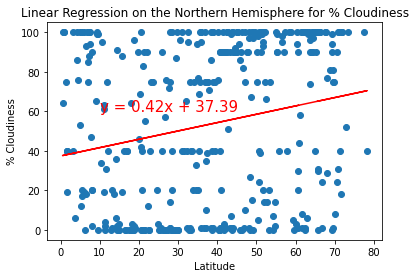

In [39]:
# Linear regression on the Northern Hemisphere % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',(10,60))

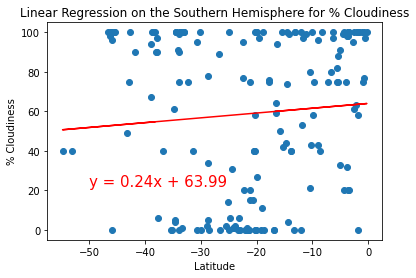

In [40]:
# Linear regression on the Southern Hemisphere % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,22))

#### Finding
The correlation between the latitude and percent cloudiness is not very strong and because the r-value is less than 0.5 for the Northern and Southern Hemispheres. This means the percentage cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.

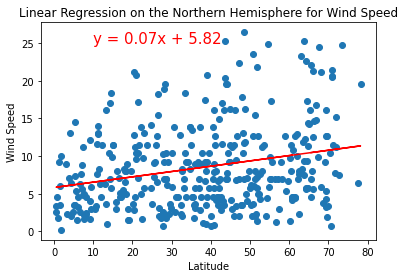

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(10,25))

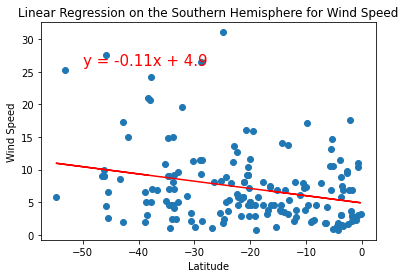

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,26))

#### Finding
The correlation between the latitude and wind speed is very low because the r-value is less  than 0.01 for the Northern Hemisphere and less than –0.12 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.